In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

In [2]:
df=pd.read_csv('Social_Network_Ads.csv') #Data source https://www.kaggle.com/code/mejbahahammad/random-forest-classification/notebook.

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.shape

(400, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
print("Total number of records: {}".format(df.shape[0]))
print("Total number of records belongs to Not Purchased : {}".format(df[df['Purchased'] ==0].shape[0]))
print("Total number of records belongs to Purchased: {}".format(df[df['Purchased'] ==1].shape[0]))

Total number of records: 400
Total number of records belongs to Not Purchased : 257
Total number of records belongs to Purchased: 143


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Gender=le.fit_transform(df.Gender.values)

In [9]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int32
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int32(1), int64(4)
memory usage: 14.2 KB


In [11]:
df.corr()

,User ID,Gender,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.025249,-0.000721,0.071097,0.007120
Gender,-0.025249,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.000721,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,-0.060435,0.155238,1.000000,0.362083
Purchased,0.007120,-0.042469,0.622454,0.362083,1.000000


<AxesSubplot:>

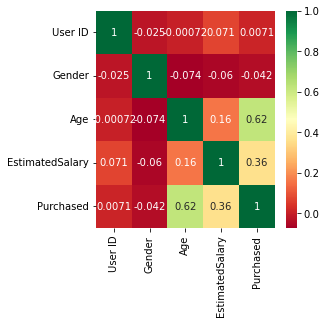

In [12]:
cor=df.corr()
plt.figure(figsize=(4,4))
sns.heatmap(cor, annot=True, cmap='RdYlGn')

In [13]:
df = df.drop('User ID', axis=1)

In [14]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [15]:
X = df.iloc[:, :3].values
y = df.iloc[:, 3].values

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
predict_dc = dc.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [21]:
acc_dc = round( metrics.accuracy_score(y_test, predict_dc) * 100 , 2 )
print( 'Accuracy of Decision Tree Classifier model : ', acc_dc )

Accuracy of Decision Tree Classifier model :  91.0


In [22]:
print(classification_report(y_test, predict_dc))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93        68
           1       0.85      0.88      0.86        32

    accuracy                           0.91       100
   macro avg       0.89      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100



In [23]:
print(confusion_matrix(y_test, predict_dc))

[[63  5]
 [ 4 28]]


C:\Users\aasho\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


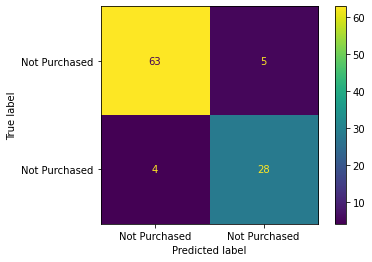

In [24]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dc, X_test, y_test, values_format='d', display_labels=['Not Purchased', 'Not Purchased'])

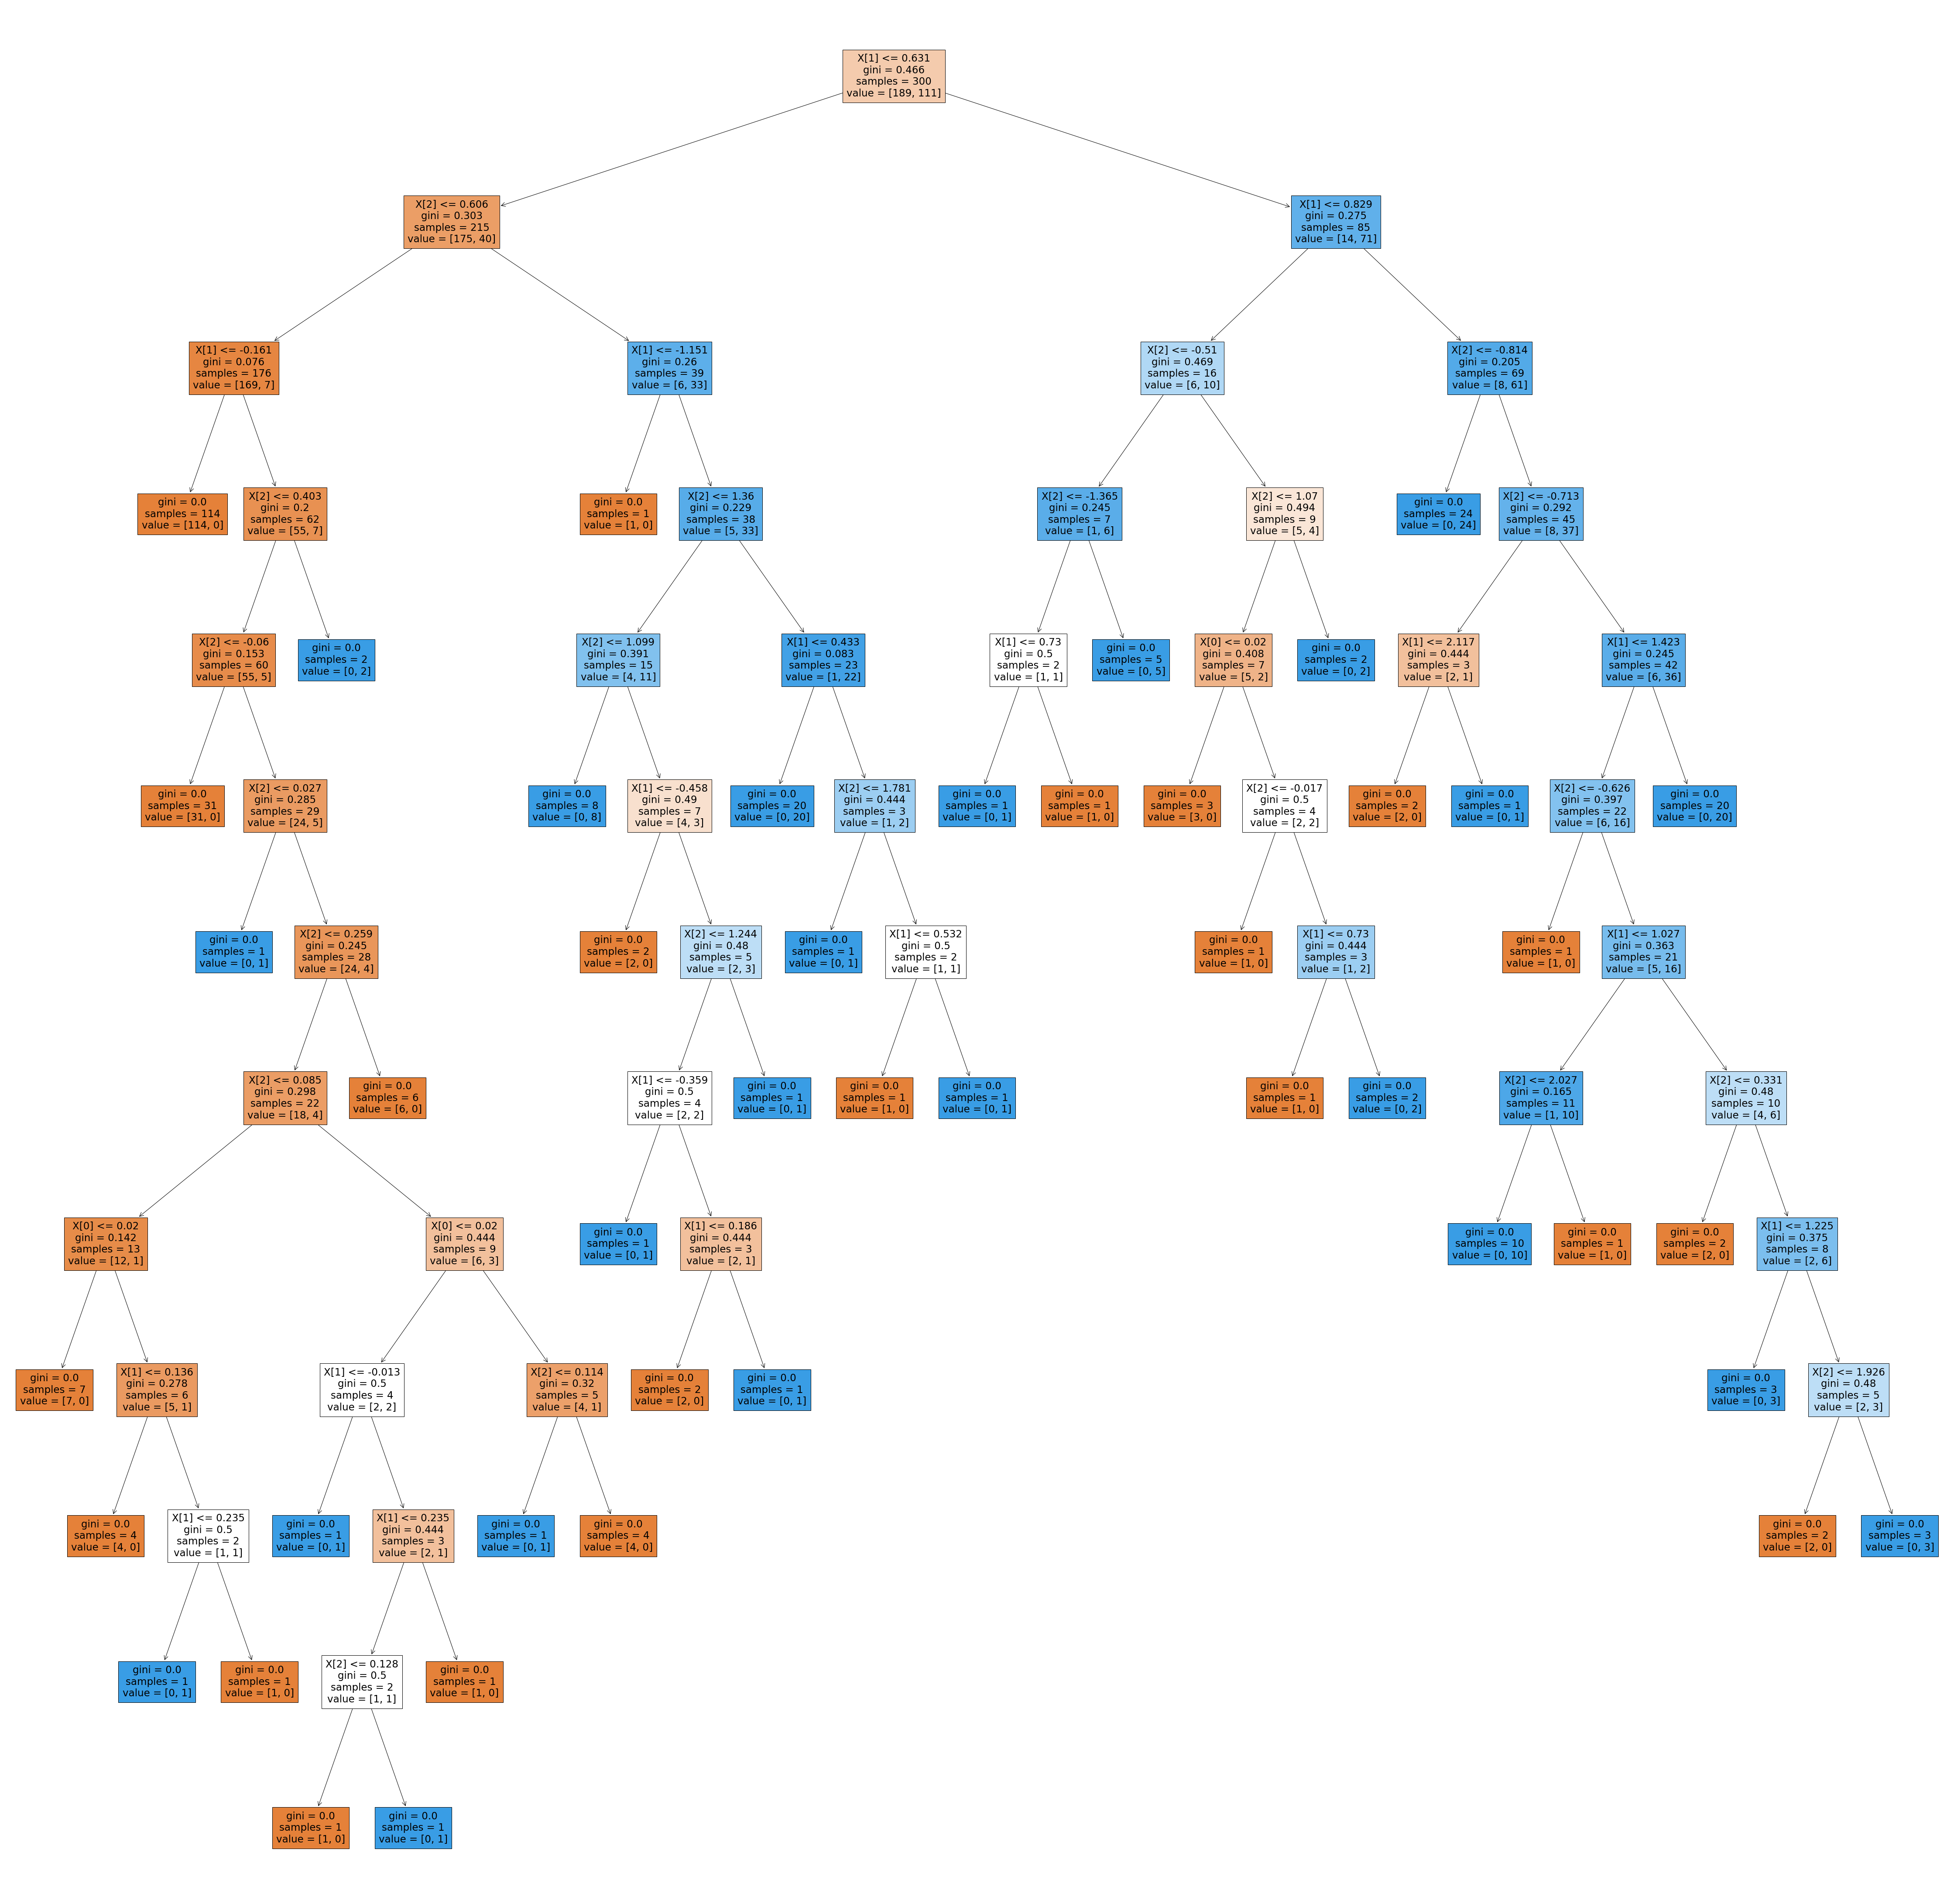

In [25]:
from sklearn import tree
plt.figure(figsize=(80,80))
tree.plot_tree(dc, filled=True)
plt.show()

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [27]:
predict_rfc = rfc.predict(X_test)

In [28]:
acc_rfc = round( metrics.accuracy_score(y_test, predict_rfc) * 100 , 2 )
print( 'Accuracy of Random Forest Classifier model : ', acc_rfc )

Accuracy of Random Forest Classifier model :  93.0


In [29]:
print(classification_report(y_test, predict_rfc))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [30]:
print(confusion_matrix(y_test, predict_rfc))

[[64  4]
 [ 3 29]]


C:\Users\aasho\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


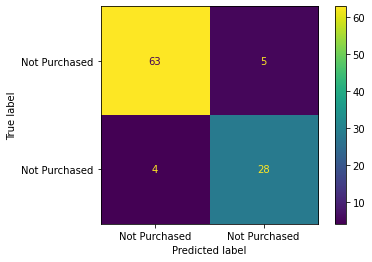

In [31]:
plot_confusion_matrix(dc, X_test, y_test, values_format='d', display_labels=['Not Purchased', 'Not Purchased'])

In [32]:
from xgboost import XGBClassifier
xgc = XGBClassifier()
xgc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [33]:
predict_xgc = xgc.predict(X_test)

In [34]:
acc_xgc = round( metrics.accuracy_score(y_test, predict_xgc) * 100 , 2 )
print( 'Accuracy of XGBoost Classifier model : ', acc_xgc )

Accuracy of XGBoost Classifier model :  92.0


In [35]:
print(classification_report(y_test, predict_xgc))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        68
           1       0.88      0.88      0.88        32

    accuracy                           0.92       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100



In [36]:
from sklearn.ensemble import AdaBoostClassifier
adc=AdaBoostClassifier()
adc.fit(X_train, y_train)

AdaBoostClassifier()

In [37]:
predict_adc = adc.predict(X_test)

In [38]:
acc_adc = round( metrics.accuracy_score(y_test, predict_adc) * 100 , 2 )
print( 'Accuracy of AdaBoost Classifier model : ', acc_adc )

Accuracy of AdaBoost Classifier model :  92.0


In [39]:
print(classification_report(y_test, predict_adc))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        68
           1       0.88      0.88      0.88        32

    accuracy                           0.92       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100



In [40]:
models = pd.DataFrame({'Model':['DecisionTree', 'RandomForest', 'XGBoost', 'AdaBoost'],'Score': [acc_dc, acc_rfc, acc_xgc, acc_adc]})

models.sort_values(by='Score', ascending=False)

,Model,Score
1,RandomForest,93.0
2,XGBoost,92.0
3,AdaBoost,92.0
0,DecisionTree,91.0


Afer applying multiple machine learning algorithms we can see that Random Forest is giving us the highest accuracy followed by XGBoost,AdaBoost and DecisionTree as per the above table.